<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/projects/2021_1/team_work_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEAM WORK

## Instructions

- Your team must completed this notebook until the informed due date.

## Identification

### TEAM X 
<!---
Change X for the letter of your team.
-->
### MEMBERS
<!---
List the team members and their e-mails
-->
Name 1 - E-mail 1    
Name 2 - E-mail 2    
Name 3 - E-mail 3    


## Assignment 1

Based on the model assigned to your team, insert text cells (including text, pictures, tables, equations, ...) to describe it. Please take care with this description and make it as complete as you can.   

NOTE: The text cells must be inserted below this one.

## Assignment 2

Linearize the model equations described at Question 1 (by hand) around an operation point. Insert text cells to describe the linearization process step by step.

NOTE: The text cells must be inserted below this one.

## Assignment 3

Apply the Laplace transform on the linearized model equations obtained at Question 2. Develop the model's block diagram, identify all the inputs and outputs and obtain all the system transfer functions. Insert text cells to describe the development process step by step.

NOTE: The text cells must be inserted below this one.

## Assignment 4

Select just one control variable, its manipulated variable and list the disturbances variables. Based on this selection and a sound engineering analysis, define the form of the transfer functions of the actuator $G_{a}(s)$ and the sensor $G_{m}(s)$, including numeric values of their parameters. Develop the closed-loop block diagram for this control loop assuming a PID controller and its respective transfer function. Obtain the closed-loop transfer functions for this control application. Insert text cells to describe the development process step by step.

NOTE: The text cells must be inserted below this one.

## Assignment 5

Based on the code templates given, adapt it to your model and insert the adapted code cells. Please take care with the code description (e.g. help, comments, measurement units). The code cells must include the setup, the model's update function, the code needed to obtain the transfer functions as well the code to obtain the process reaction curve.

NOTE: The code cells must be inserted below this one.

In [7]:
# uncomment the 2 lines below if you had error
!pip install control
!pip install slycot
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import slycot # to MIMO systems

     |████████████████████████████████| 339 kB 8.4 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344929 sha256=68d39f2808db3278caa964e7cb83e1f0652d75617c6f10af0cf4bc8c4d55126a
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control
     |████████████████████████████████| 1.5 MB 6.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417931 sha256=8eb113a8d0a4ee42a71545ade2ed42c43ea1390bb96be773f754734e2eb1ddb6
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built slycot


In [5]:
def polyeth_update(t, x, u, params={}):
  """Gas phase polyethylene reactor dynamics.
    Dadebo, S. A., Bell, M. L., McLellan, P. J., & McAuley, K. B. (1997). 
    Temperature control of industrial gas phase polyethylene reactors. 
    Journal of Process Control, 7(2), 83–95. doi:10.1016/s0959-1524(96)00016-9 

    Parameters
    ----------
    x : array
         System state: In_con, molar concentration of inert components in the 
                       gas phase in mol/1
                       M1_con, molar concentration of ethylene in the 
                       gas phase in mol/1
                       Y1, moles of active site type 1, mol
                       Y2, moles of active site type 2, mol
                       T, reactor temperature in K
                       Tw1, temperature of cooling water stream leaving stage 1
                       of heat exchanger in K
                       Tg1, temperature of recycle gas stream leaving stage 1 
                       of heat exchanger in K
    u : array
         System input: Fc, flow rate of catalyst in kg/s
                       Tfeed, feed temperature in K

    Returns
    -------
    y : array
        The time derivatives of In_con, M1_con, Y1, Y2, T, Tw1 and Tg1

    """
  
  # Set up the system parameters
  Vg    = params.get('Vg', 500.)                   # m3
  Vp    = params.get('Vp',   0.5)                  # 
  Pv    = params.get('Pv',  17.)                   # atm
  Bw    = params.get('Bw', 7.0e4)                  # kg
  kp0   = params.get('kp0', 85.0e-3)               # m3/(mol s) 
  Ea    = params.get('Ea', 9e4*4.1868)             # J/mol  
  Cpm1  = params.get('Cpm1', 11*4.1868)            # J/(mol K)  
  Cv    = params.get('Cv', 7.5)                    # atm^-0.5
  Cpw   = params.get('Cpw', 4.1868e3)              # J/(kg K)
  CpIn  = params.get('CpIn', 6.9*4.1868)           # J/(kg K)
  Cppol = params.get('Cppol', 0.85e3*4.1868)       # J/(kg K)
  kd1   = params.get('kd1', 1e-4)                  # s^-1
  kd2   = params.get('kd2', 1e-4)                  # s^-1
  Mw1   = params.get('Mw1', 28.05e-3)              # kg/mol
  Mw    = params.get('Mw', 3.314e4)                # kg
  Mg    = params.get('Mg', 6060.5)                 # mol
  MrCpr = params.get('MrCpr', 1.4*4.1868e7)        # J/K
  Hreac = params.get('Hreac', -894*4.1868e3)       # J/kg
  UA    = params.get('UA', 1.14*4.1868e6)          # J/(K s)
  FIn   = params.get('FIn', 5.)                    # mol/s
  FM1   = params.get('FM1', 190.)                  # mol/s
  Fg    = params.get('Fg', 8500.)                  # mol/s
  Fw    = params.get('Fw', 3.11e5*18e-3)           # kg/s
  Tf    = params.get('Tf', 360.)                   # K
  Twi   = params.get('Twi', 289.56)                # K
  RR    = params.get('RR', 8.20575e-5)             # (m3 atm)/(mol K)
  R     = params.get('R', 8.314)                   # J/(mol K)
  ac    = params.get('ac', 0.548)                  # mol/kg

  # Define variables for reactor state and inputs
  In_con = x[0]     # molar concentration of inert components in the gas phase
  M1_con = x[1]     # molar concentration of ethylene in the gas phase
  Y1     = x[2]     # moles of active site type 1
  Y2     = x[3]     # moles of active site type 2
  T      = x[4]     # reactor temperature
  Tw1    = x[5]     # temperature of cooling water stream leaving stage 1 of heat exchanger
  Tg1    = x[6]     # temperature of recycle gas stream leaving stage 1 of heat exchanger

  Fc     = u[0]      # flow rate of catalyst
  Tfeed  = u[1]      # feed temperature

  # Define the algebric equations
  bt   = Vp * Cv * np.sqrt((M1_con+In_con) * RR * T - Pv)
  RM1  = M1_con * kp0 * np. exp(-Ea/R*(1/T-1/Tf)) * (Y1+Y2)
  Cpg  = M1_con/(M1_con + In_con) * Cpm1 + In_con/(M1_con + In_con) * CpIn
  Hf   = FM1 * Cpm1 * ( Tfeed - Tf) + FIn * CpIn * (Tfeed - Tf)
  Hg1  = Fg * (Tg1 - Tf) * Cpg
  Hg0  = (Fg + bt) * (T - Tf) * Cpg
  Hr   = Hreac * Mw1 * RM1
  Hpol = Cppol * (T - Tf) * RM1 * Mw1

  # Define the ODEs
  dIn_condt = (FIn - In_con/(M1_con + In_con) * bt)/Vg
  dM1_condt = (FM1 - M1_con/(M1_con + In_con) * bt - RM1)/Vg
  dY1dt     = Fc * ac - kd1 * Y1 - RM1 * Mw1 * Y1/ Bw
  dY2dt     = Fc * ac - kd2 * Y2 - RM1 * Mw1 * Y2/ Bw
  dTdt      = (Hf + Hg1 - Hg0 - Hr - Hpol)/(MrCpr + Bw * Cppol)
  dTw1dt    = Fw/Mw * (Twi - Tw1) - UA/(Mw * Cpw) * (Tw1 - Tg1)
  dTg1dt    = Fg/Mg * (T - Tg1)   + UA/(Mg * Cpg) * (Tw1 - Tg1)

  return [dIn_condt, dM1_condt, dY1dt, dY2dt, dTdt, dTw1dt, dTg1dt]

In [8]:
# Obtain the transfer functions of the input/output system for the polyethylene 
# reactor model
polyeth = ct.NonlinearIOSystem(
    polyeth_update, None, name='polyeth',
    inputs  = ('Fc', 'Tfeed'), 
    outputs = ('In_con', 'M1_con', 'Y1', 'Y2', 'T', 'Tw1', 'Tg1'), 
    states  = ('In_con', 'M1_con', 'Y1', 'Y2', 'T', 'Tw1', 'Tg1'))

polyeth_linearized = polyeth.linearize(x0 = [439.68, 326.72, 3.835, 3.835, 
                                             356.21, 290.37, 294.36], 
                                       u0 = [5.8/3600, 293.00])

polyeth_tf = ct.ss2tf(polyeth_linearized)

polyeth_tf

TransferFunction([[array([9.46852224e-19, 6.44609843e-08, 1.50583801e-06, 2.59700707e-07,
       7.48657137e-10]), array([-1.68264613e-09, -3.92867793e-08, -6.30527072e-09,  6.05633796e-11,
        7.51973382e-15])], [array([-1.59475609e-02, -3.72508863e-01, -6.35166517e-02, -6.26087969e-05,
       -2.26437079e-09]), array([-1.15351205e-06, -2.69431062e-05, -4.57151414e-06, -7.26868523e-10,
       -2.05331561e-14])], [array([ 5.48000000e-01,  1.27968423e+01,  2.09994251e+00, -1.18717932e-02,
       -1.91581309e-06, -7.01721672e-11]), array([-8.85362912e-10, -2.06797454e-08, -3.50695257e-09, -2.43779660e-13,
       -3.73066812e-18])], [array([ 5.48000000e-01,  1.27968423e+01,  2.09994251e+00, -1.18717932e-02,
       -1.91581309e-06, -7.01721672e-11]), array([-8.85362912e-10, -2.06797454e-08, -3.50695257e-09, -2.43779660e-13,
       -3.73066812e-18])], [array([2.73029436e-03, 6.37728349e-02, 1.08224937e-02, 2.04164611e-06,
       7.22391005e-11]), array([2.89047674e-05, 6.75153293e-04, 1

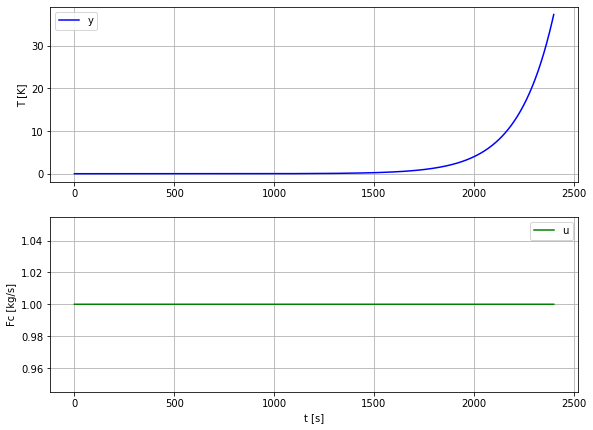

In [17]:
# Obtain the process reaction curve response
# Define the simulation time
T0 = 0
T1 = 2400
dt = 0.01
nt = int (T1/dt) + 1 # Number of points of sim time
T = np.linspace(T0, T1, nt)

# Perform the simulation
Ga = 1
Gm = 1
Gp = polyeth_tf[5,1]
T, yout = ct.step_response(Ga*Gp*Gm, T)

# Plot the process reaction curve response
plt.close ('all')
fig_width_cm = 24
fig_height_cm = 18
plt.figure(1, figsize=(fig_width_cm /2.54 , fig_height_cm /2.54))
plt.subplot(2, 1, 1)
plt.plot(T, yout, 'blue')
plt.ylabel('T [K]')
plt.grid()
plt.legend(labels =('y',))
plt.subplot(2, 1, 2)
plt.plot(T, [1]*len(T), 'green')
plt.ylabel('Fc [kg/s]')
plt.xlabel('t [s]')
plt.grid()
plt.legend(labels =('u', ))

## Assignment 6

Use the process reaction curve obtained at Question 5 to develop a FOLPD (or a IPD) approximation of the process reaction curve transfer function $G_{PRC}(s)$. Insert text cells to describe the development process step by step.

NOTE: FOLPD means first-order lag plus time delay and IPD means integral plus time delay.

## Assignment 7

Based on the template given, code the tuning rules assigned to your team. Insert one code cell for each tuning rule. Please take care with the code description (e.g. help, comments, measurement units) and adapt all code to the respective tuning rule.

NOTE: The code cells must be inserted below this one.

In [ ]:
def callender356_folpd_pi(Km, taum, Tm, rule):
  r'''Calculates the PI controller parameters for a FOLPD process reaction 
  curve using the rule of Callender et al. (1935/6).

  Parameters
  ----------
  Km : float
       Static gain of the process reaction curve, [-] 
  taum : float
       Dead time of the process reaction curve, [min]
  Tm : float
       Time constant (lag) of the process reaction curve, [min]
  rule : integer
       If rule = 1, the rule gives decay ratio = 0.015 and period of decaying 
       oscillation = 5.10*taum.
       If rule = 2, the rule gives decay ratio = 0.043 and period of decaying 
       oscillation = 6.28*taum.

  Returns
  -------
  Kc : float
       Proportional gain, [-]

  Ti : float
       Integral time, [min]

  Notes
  -----
  Applicable to taum/Tm = 0.3.

  Example
  --------

  >>> callender356_folpd_pi(Km=1, taum=3, Tm=10, rule=1)
  [0.18933333333333333, 10.92]  

  Reference
  ----------
  .. [1] O’Dwyer, A. Handbook of PI and PID Controller Tuning Rules. London:
     Imperial College Press, 2009.
  '''
  if rule not in [1,2]:
    return []
  # Rule 1 (Table 9, p. 30)
  if rule == 1:
    Kc = 0.568/(Km*taum)
    Ti = 3.64*taum
    return [Kc, Ti]
  # Rule 2 (Table 9, p. 30)
  if rule == 2:
    Kc = 0.690/(Km*taum)
    Ti = 2.45*taum
    return [Kc, Ti]

## Assignment 8

Based on the process reaction curve transfer function $G_{PRC}(s)$ obtained at Question 6 and the functions coded at Question 7, choose one tuning rule function coded by each team member and obtain the respective values of the controller parameters. Provide a summary table listing the tuning rules and the controlle parameters. 

## Assignment 9

Choose two sets of parameter values from the ones obtained at Question 8, one for PI and other for PID controller. Obtain the closed-loop transfer functions for servo control using the process reaction curve transfer function obtained at Question 6. Check the stability of the closed-loop by calculating their poles.

NOTE: The code cells must be inserted below this one.

## Assignment 10

For each controller parameters sets obtained at Question 8 and the template code given, simulate two closed-loop responses, one for a step in the setpoint and the other for a step in one of the disturbances. Comment the obtained responses regarding the performance of the tuning rules and indicate the best tuning rule for the servo control and for the regulator control.

NOTE: Define the step amplitude values based on a sound engineering analysis. The code cells must be inserted below this one.

In [ ]:
# Function to calculate the error-integral criteria
def error_integral_criteria(C, R, T, crit):
  dt = T[1]-T[0]
  if crit == 'IAE':
    return sum(np.abs(R-C)*dt)
  if crit == 'ITAE':
    return sum(np.abs(R-C)*T)
  if crit == 'ISE':
    return sum((R-C)**2*dt)
  if crit == 'ITSE':
    return sum((R-C)**2*T)

# Define K_m
K_m = 1 # change to your Gm gain

# Define G_c
G_c = 1 # change to your tuned Gc

# Define G_a
G_a = 1 # change to your Ga

# Define G_p
G_p = 1 # change to your Gp (the "real" one, not its FOPTD approximation)

# Define G_L
G_L = 1 # change to your GL

# Define G_m
G_m = 1 # change to your Gm

# Define G_PRC (process reaction curve transfer function)
G_PRC = G_a*G_p*G_m

# Define G_SCR (closed-loop servo control response transfer function)
G_SCR = K_m*G_c*G_a*G_p/(1 + G_c*G_PRC)

# Define G_RCR (closed-loop regulatory control response transfer function)
G_RCR = G_L/(1 + G_c*G_PRC) 

# Simulate the servo control closed-loop response
T0 = 0
T1 = 60
nt = 1000 # Number of points of sim time
T = np.linspace(T0, T1, nt)
R = np.ones(nt) # unit step on R

T, C = ct.step_response(G_SCR, T)

plt.close ('all')
fig_width_cm = 24*2
fig_height_cm = 18*2
plt.figure(1, figsize=(fig_width_cm /2.54 , fig_height_cm /2.54))

plt.subplot(3, 1, 1)
plt.plot(T, C, 'b-')
plt.plot(T, R, 'r-.')
plt.ylabel('C or R [-]') # change this according your model
plt.xlabel('t [-]') # change this according your model
plt.grid()
plt.legend(labels =('C','R')) # change this according your model

print('Error-integral criteria for servo control:\n')
for crit in ['IAE', 'ITAE', 'ISE', 'ITSE']:
  print('   {0} = {1}\n'.format(crit, error_integral_criteria(C, R, T, crit)))

# Simulate the regulatory control closed-loop response
T, yout = ct.step_response(G_RCR, T)
L = np.ones(nt) # unit step on L
R = 0*R # regulatory control means R = 0

plt.subplot(3, 1, 2)
plt.plot(T, C, 'b-')
plt.plot(T, R, 'r-.')
plt.ylabel('C or R [-]') # change this according your model
plt.xlabel('t [-]') # change this according your model
plt.grid()
plt.legend(labels =('C','R')) # change this according your model

print('Error-integral criteria for regulatory control:\n')
for crit in ['IAE', 'ITAE', 'ISE', 'ITSE']:
  print('   {0} = {1}\n'.format(crit, error_integral_criteria(C, R, T, crit)))